In [35]:
import os, re
import numpy as np
import pickle as pkl
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
def decode(path_from, path_to, separator):
    if not os.path.exists(path_to):
        os.makedirs(path_to)
    from pydub import AudioSegment
    for l in [filename for filename in os.listdir(path_from) if '.mp3' in filename]:
        try:
            sound = AudioSegment.from_mp3(os.path.abspath(path_from + l))
            sound.export(os.path.abspath(path_to)+separator+re.split('[.]', l)[0]+'.wav', format="wav")
            print('Successfully decoding ' + os.path.abspath(path_to+l) + ' to WAV')
        except Exception as e:
            file = os.path.abspath(path_to+l)
            print(f'Error: {file} - unsuccessfully decoding. ', e)

In [21]:
def extr_mfcc(file_name):
    import scipy.io.wavfile as wav
    import speechpy
    try:
        fs, signal = wav.read(file_name)
        signal = signal[:,0]
    except Exception as e:
        print(f'Error: reading wav file {file_name}.', e)
    try:
        mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
                 num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
        mfcc_cmvn = speechpy.processing.cmvnw(mfcc,win_size=301,variance_normalization=True)
        mfcc_feature_cube = speechpy.feature.extract_derivative_feature(mfcc)
        return (mfcc, mfcc_cmvn, mfcc_feature_cube)
    except Exception as e:
        print("Error: feature extraction from file {file_name}.", e) 
        return (np.asarray([]), np.asarray([]), np.asarray([]))

In [4]:
def get_playlist(path):
    for l in [filename for filename in os.listdir(path) if '.wav' in filename]:
        yield os.path.abspath(path+l)

In [5]:
def dump(file_name, path_to, data):
    if not os.path.exists(path_to):
        os.makedirs(path_to)
    pkl_name = re.split(r'\\',file_name)[-1][:-4]
    pkl.dump(features[0], open(path_to + pkl_name, 'wb'))

In [39]:
def plot_2d_features(features, range_from, range_to, plotname):
    ig, ax = plt.subplots()
    mfcc_data= np.swapaxes(features[range_from:range_to], 0 ,1)
    cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
    ax.set_title(plotname)
    #Showing mfcc_data
    plt.show()
    
    plt.figure(figsize = (20, 10))
    #Showing mfcc_feat
    plt.plot(features[range_from:range_to])
    plt.show()

In [17]:
decode(path_from = '.\\tracks\\', path_to = '.\\wavs\\', separator = '\\')

Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elthon John - Sacrifice.mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Bennie and the Jets (with lyrics).mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Can you feel the love tonight.mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Candle In The Wind.mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - I Guess That's Why They Call It The Blues.mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - I'm Still Standing.mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Rocket Man (Official Music Video).mp3 to WAV
Successfully decoding c:\Users\Kozyrevsky-V\Docu

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elthon John - Sacrifice.wav


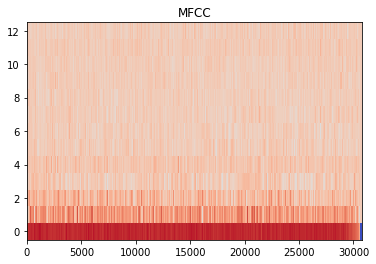

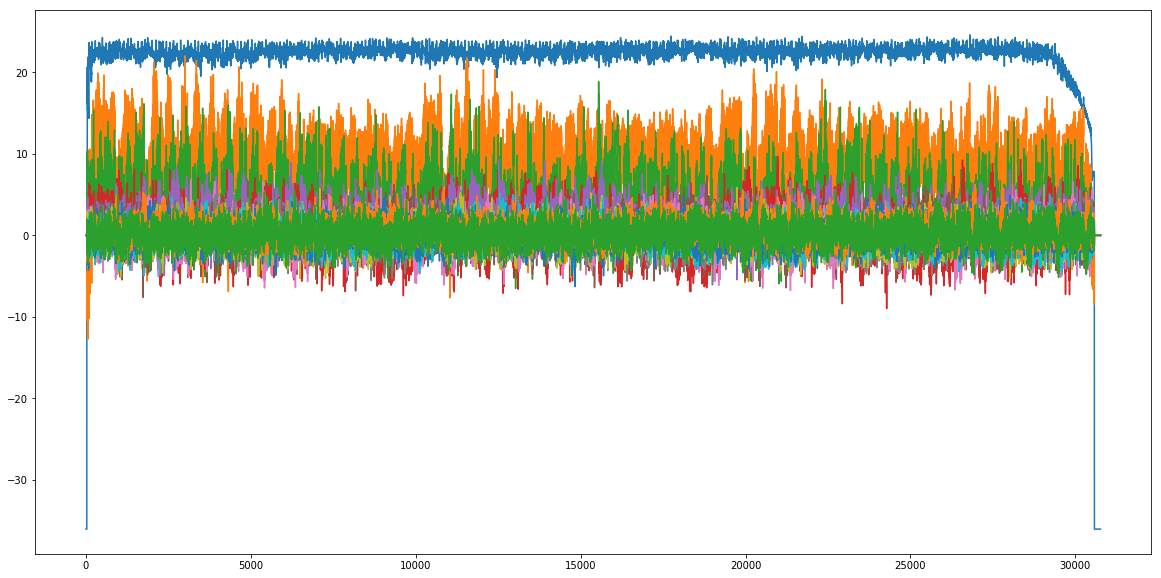

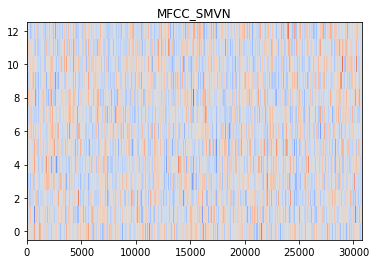

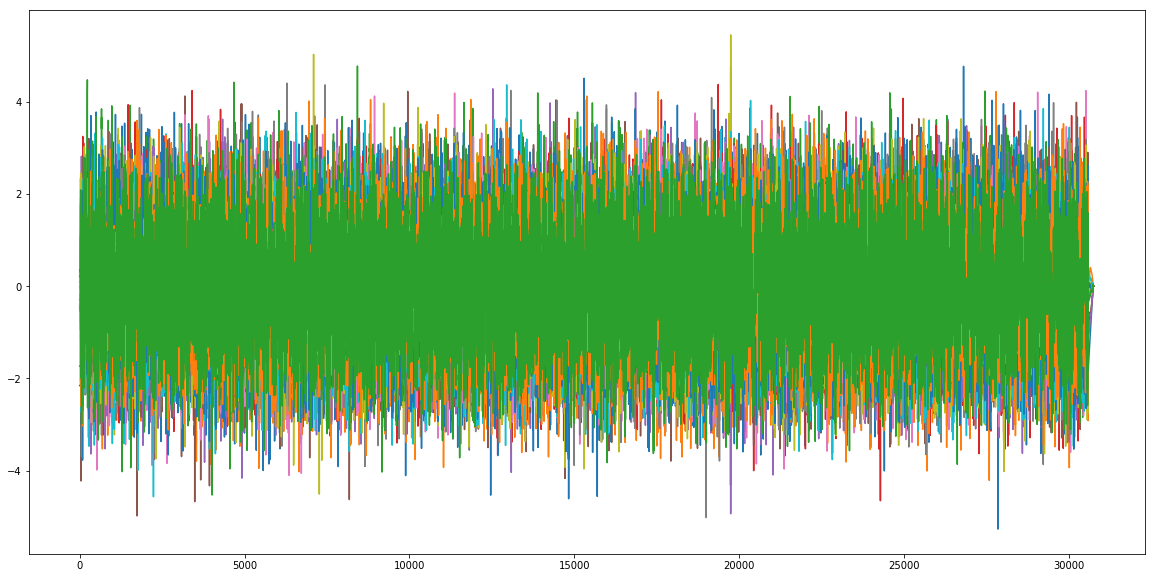

Error: reading wav file c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Bennie and the Jets (with lyrics).wav. too many indices for array
c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Bennie and the Jets (with lyrics).wav


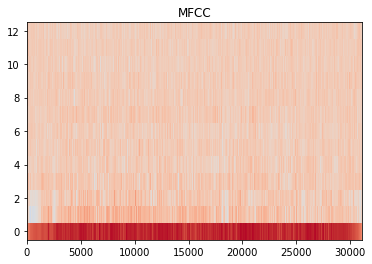

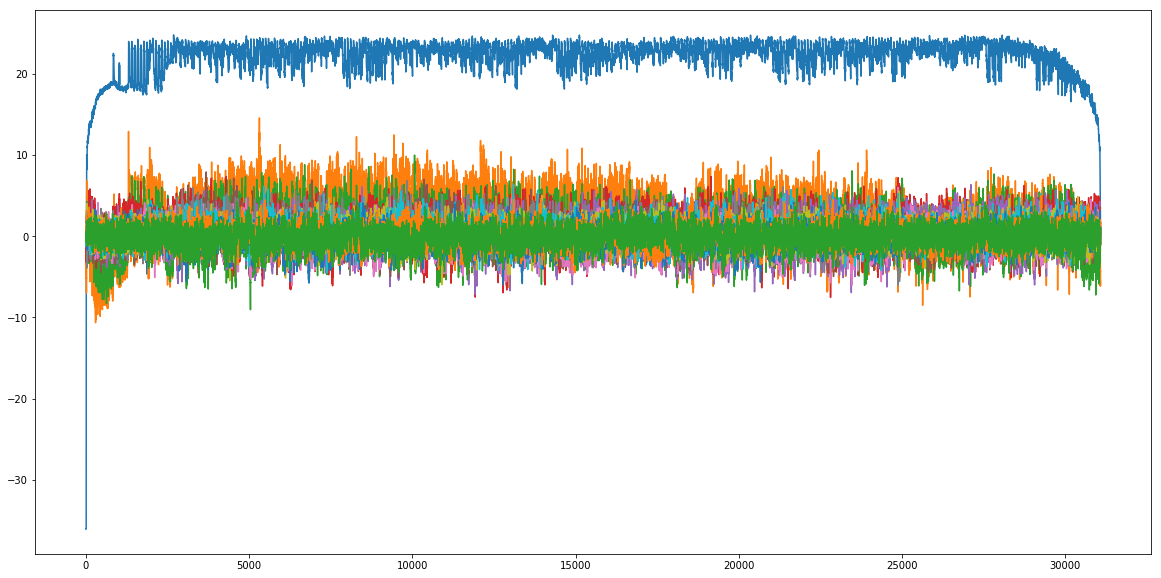

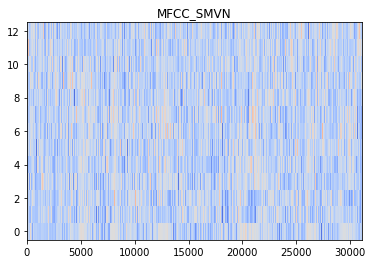

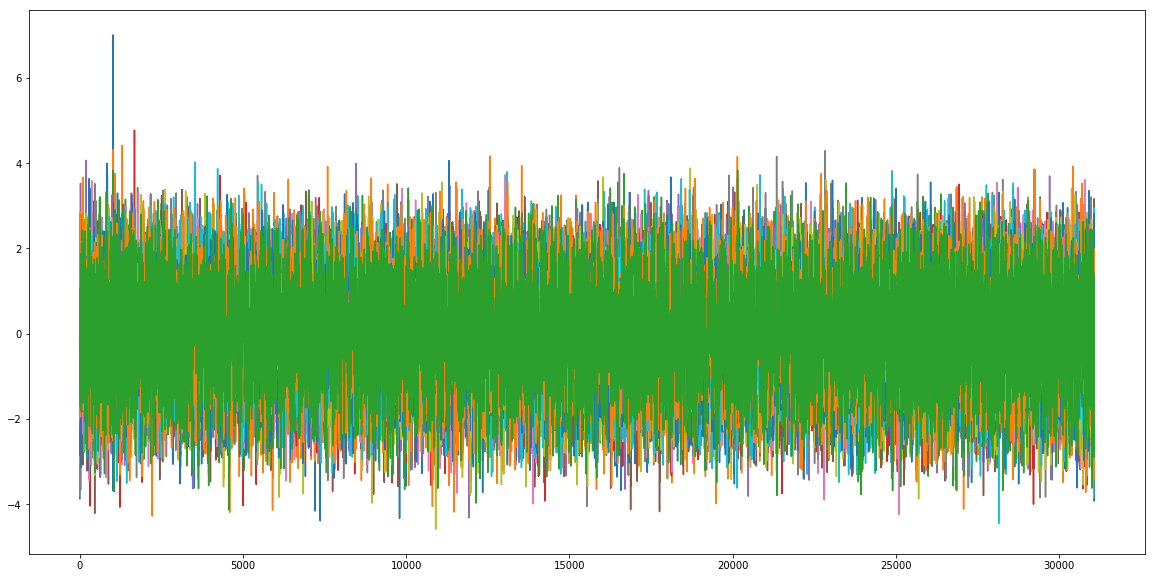

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Can you feel the love tonight.wav


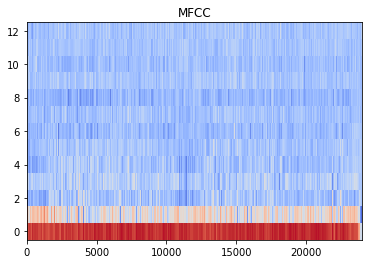

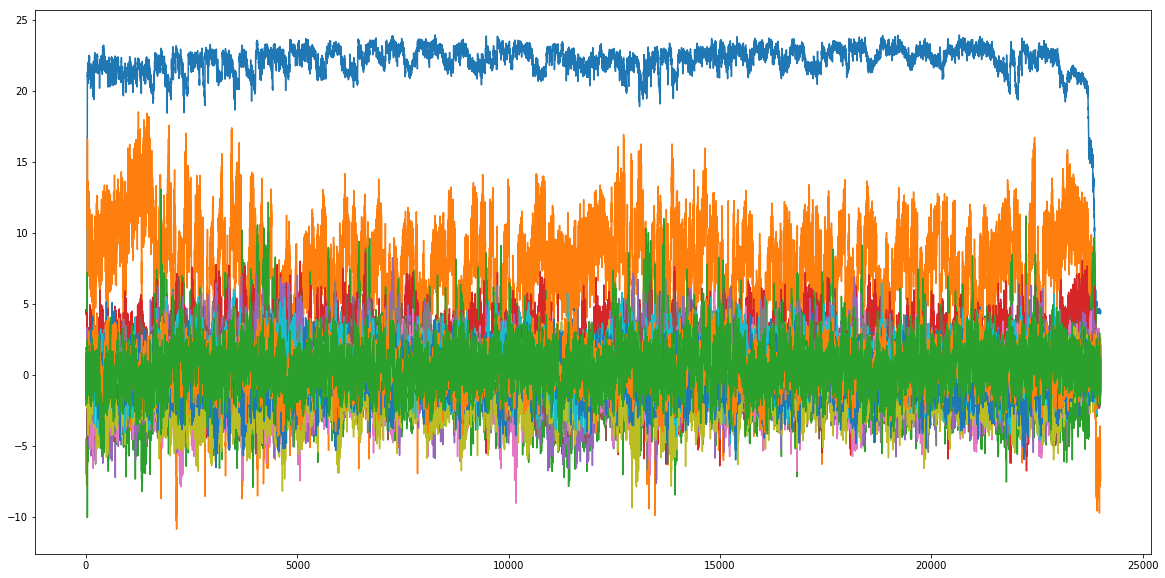

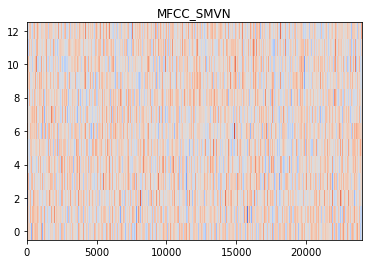

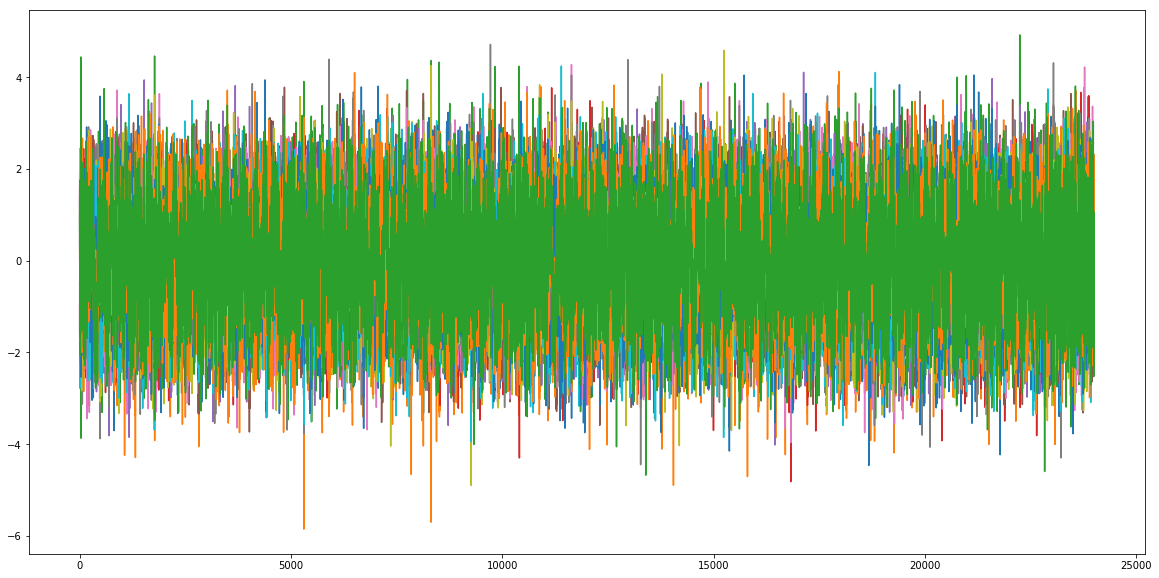

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Candle In The Wind.wav


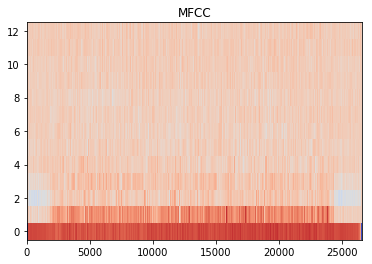

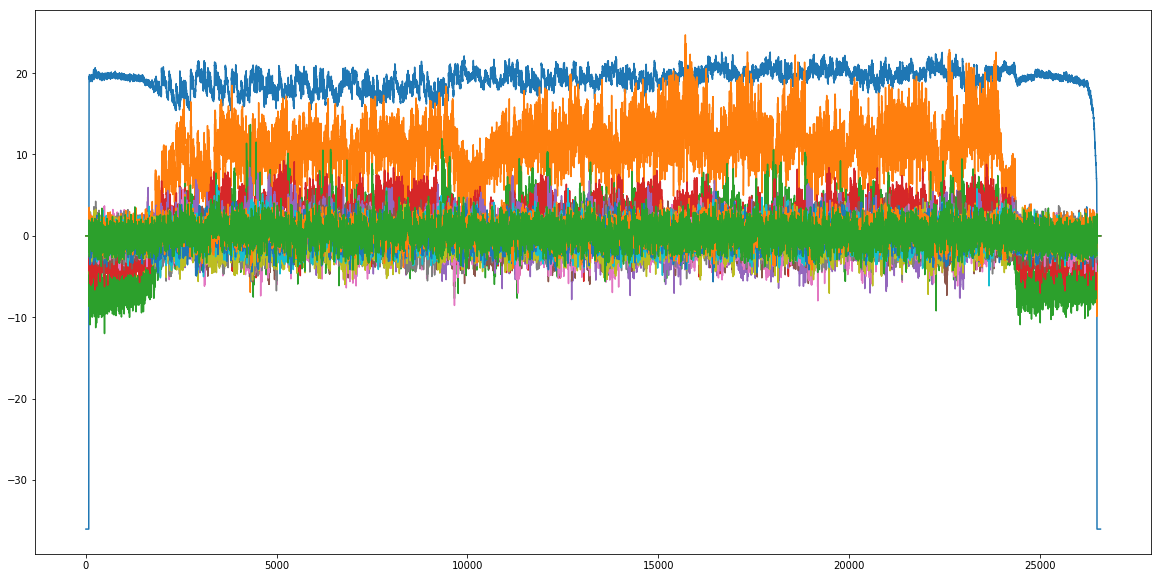

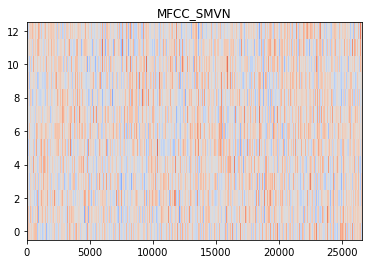

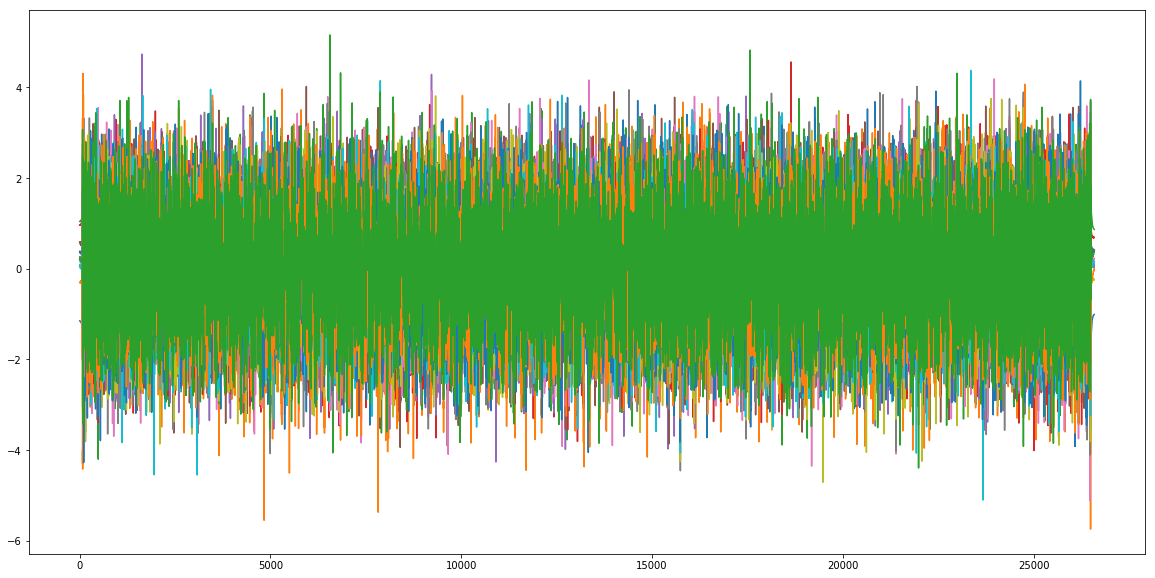

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - I Guess That's Why They Call It The Blues.wav


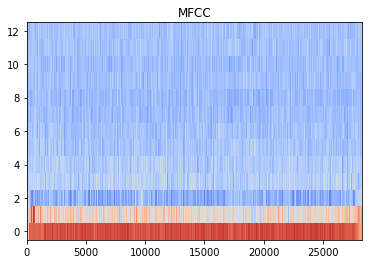

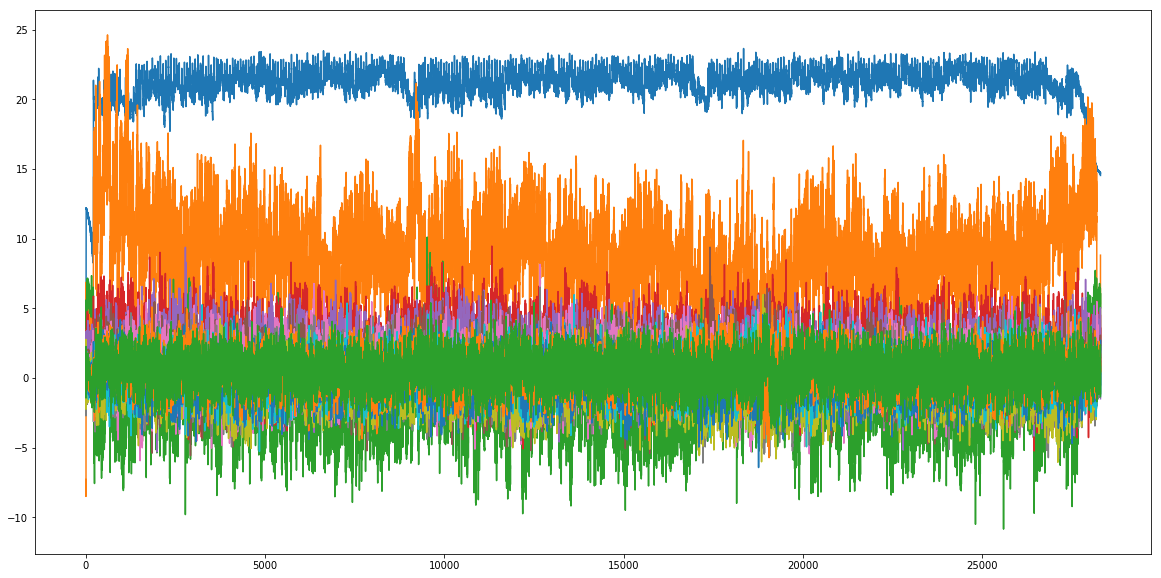

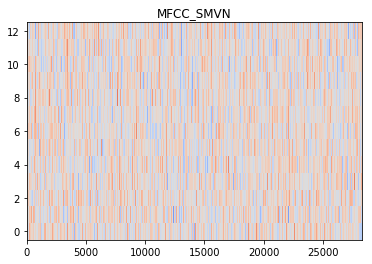

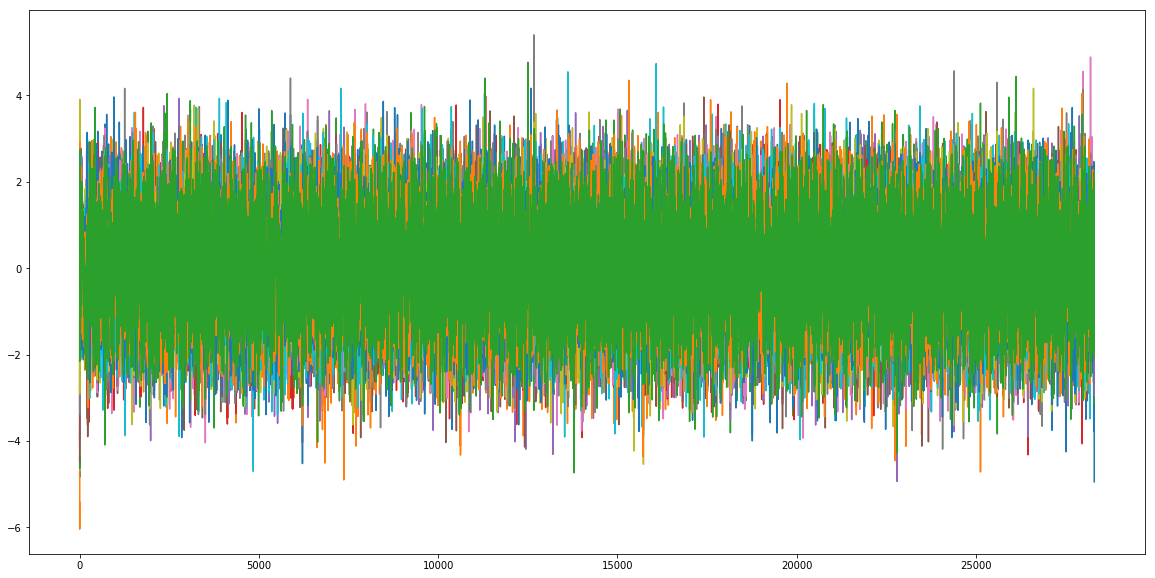

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - I'm Still Standing.wav


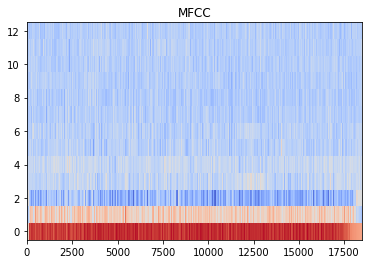

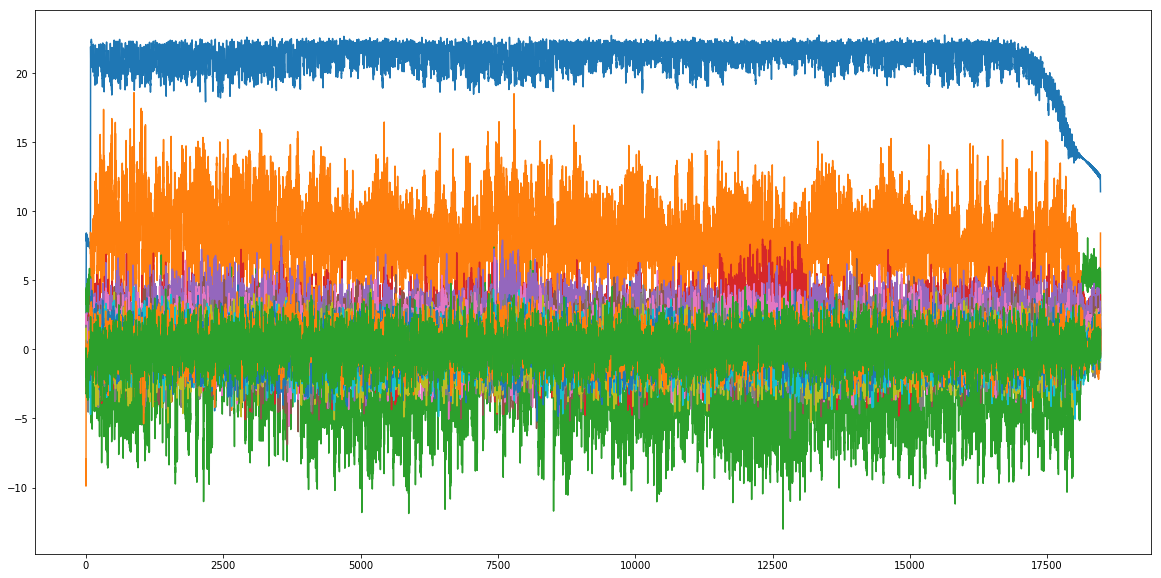

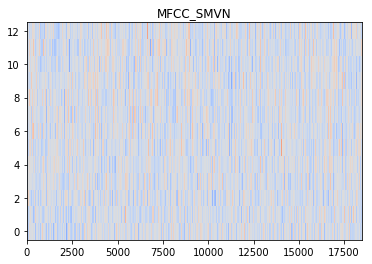

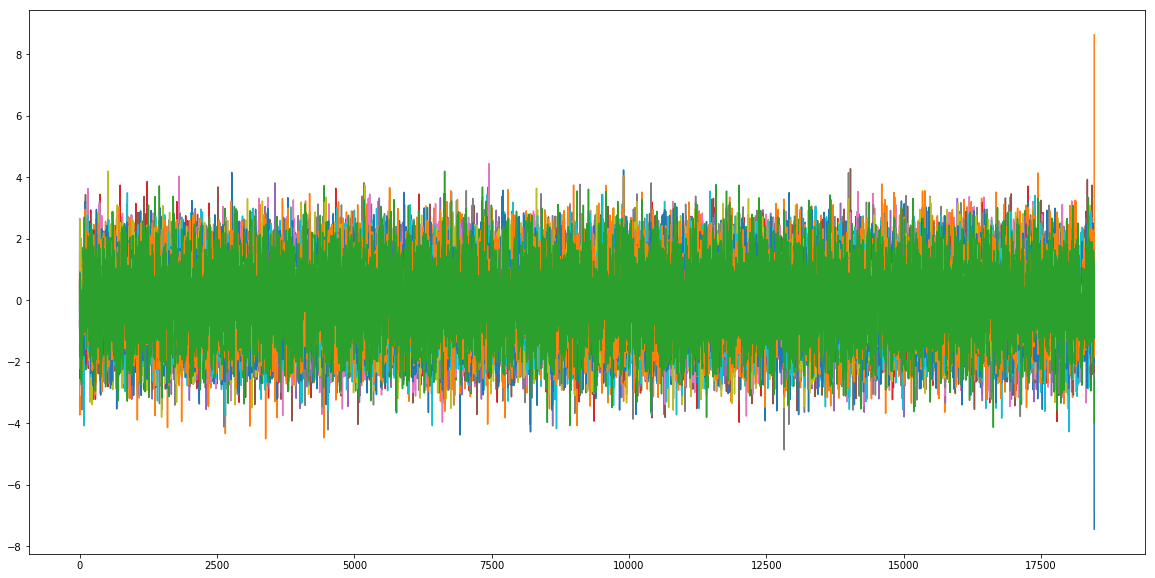

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Rocket Man (Official Music Video).wav


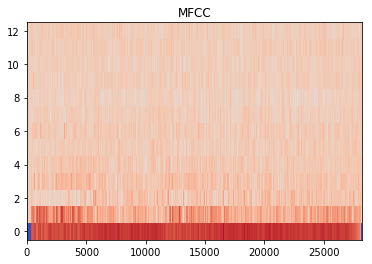

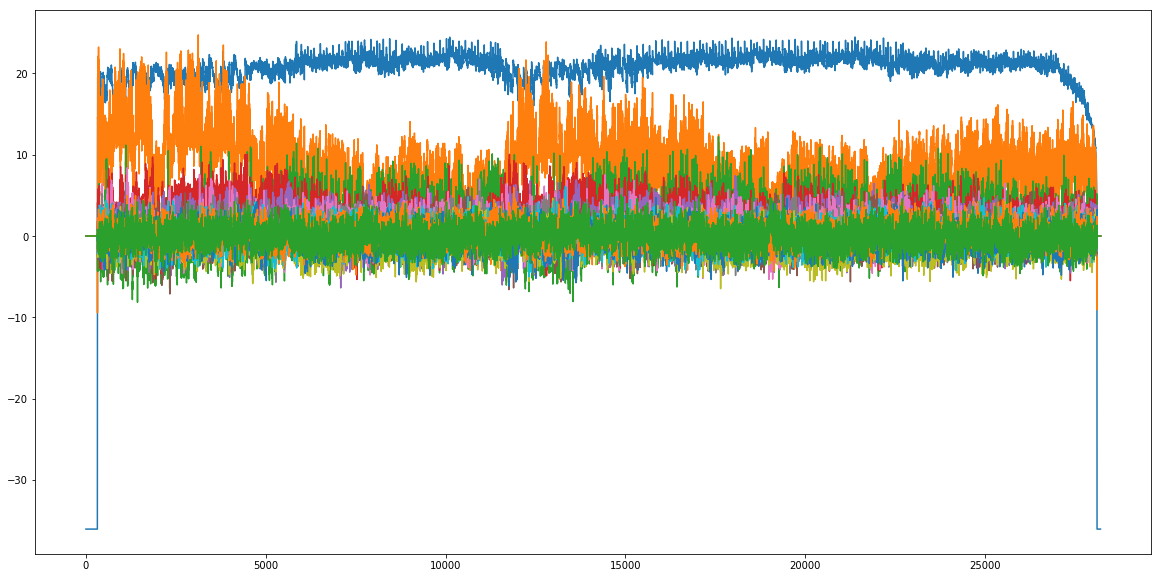

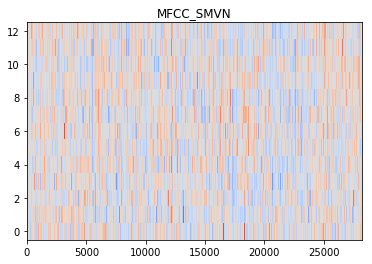

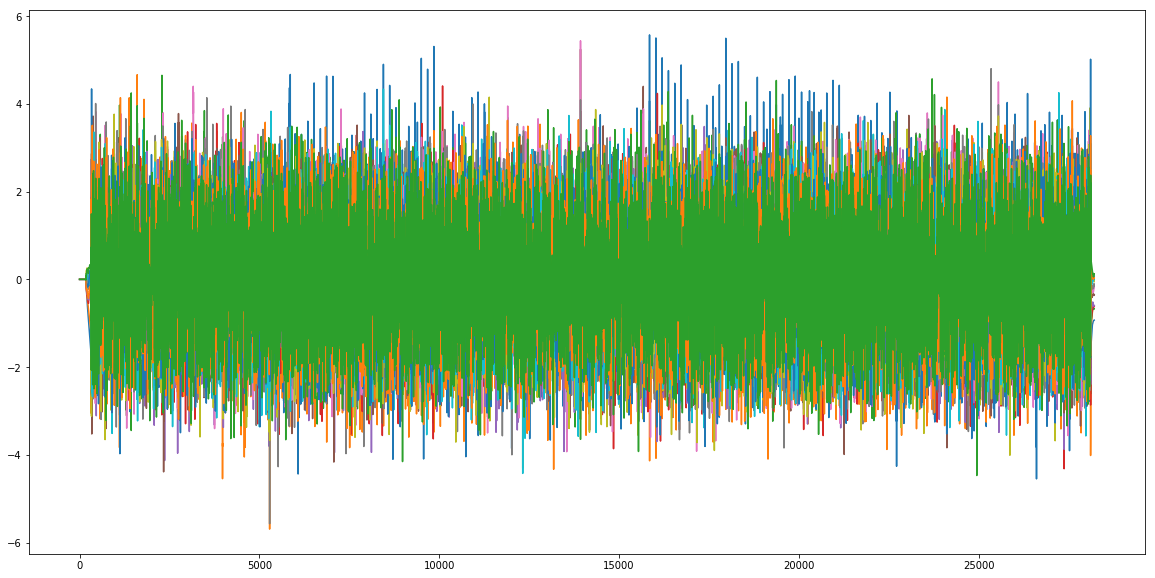

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Spirit In The Sky.wav


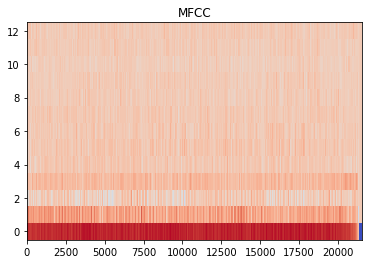

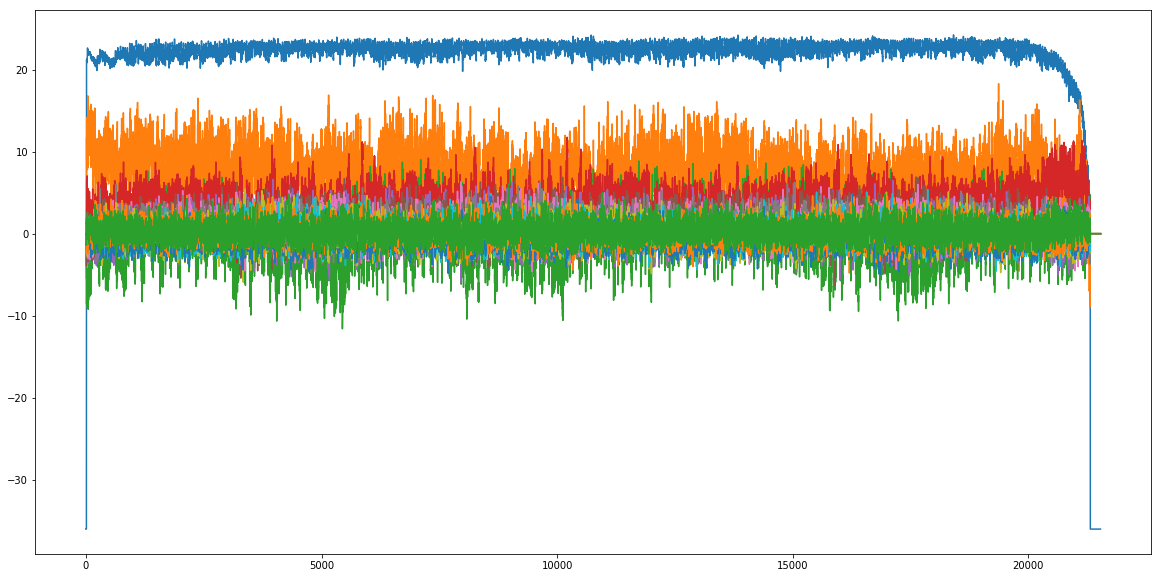

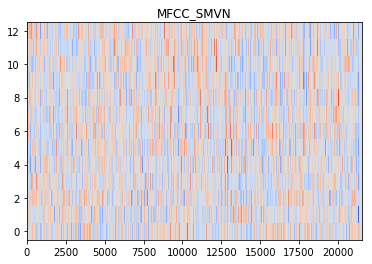

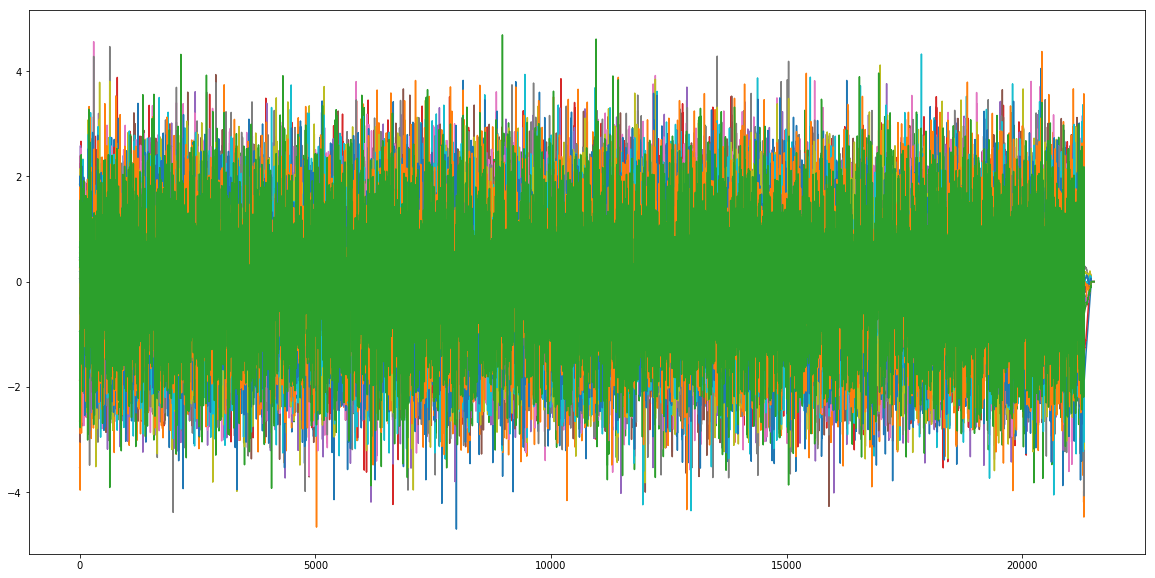

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Tiny Dancer (Official Music Video).wav


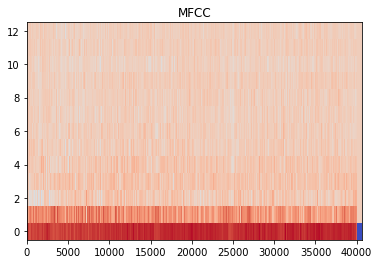

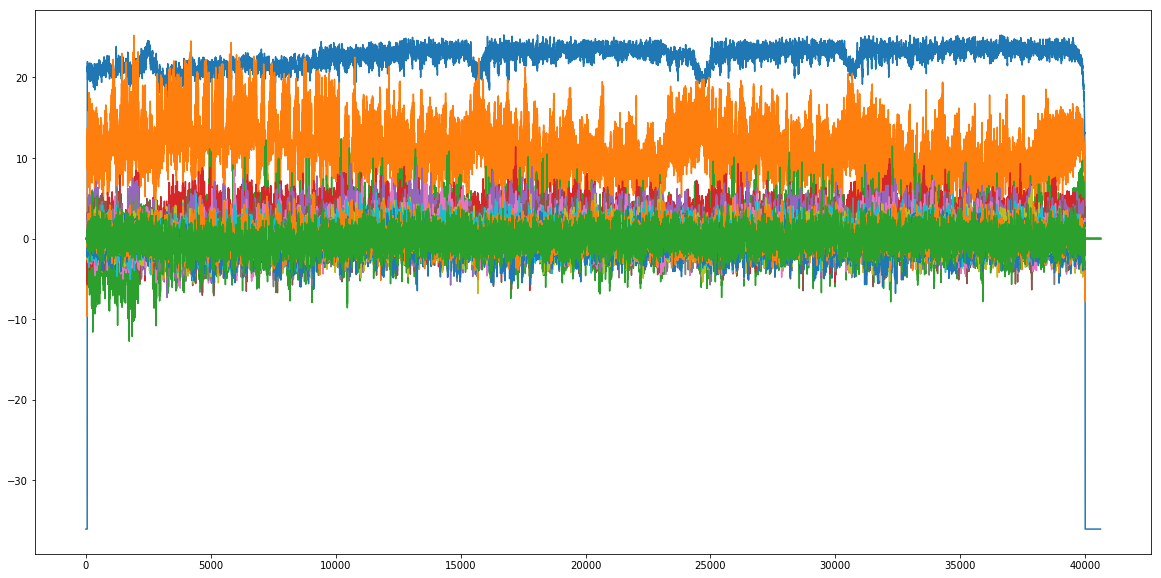

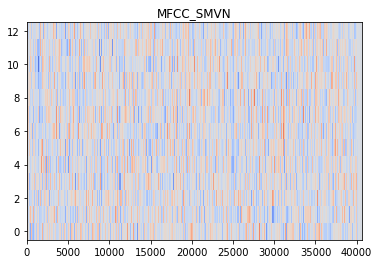

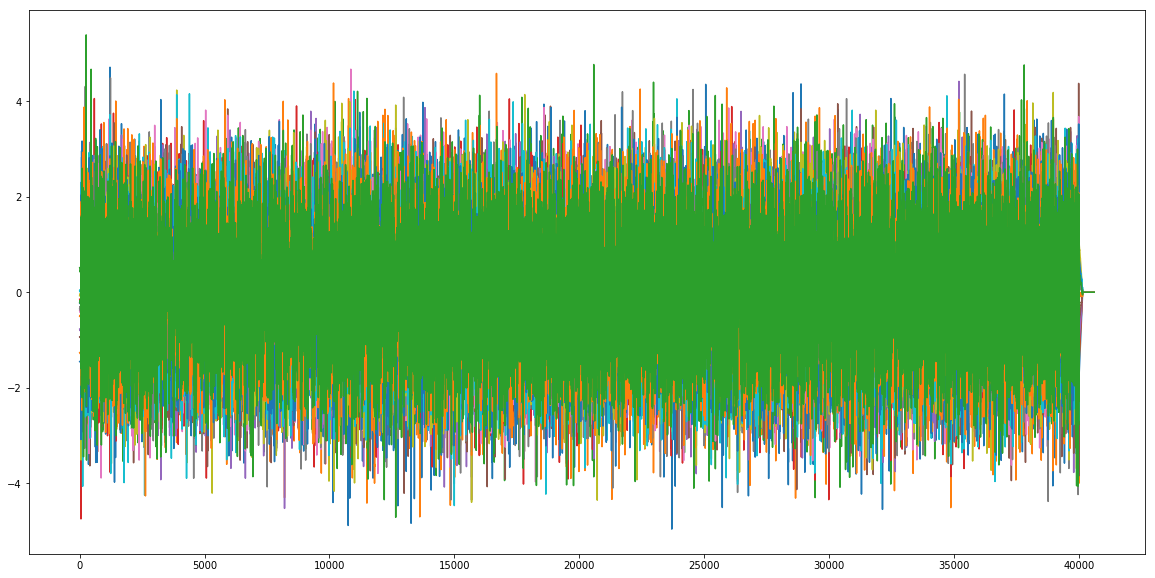

c:\Users\Kozyrevsky-V\Documents\recom\RecomendationSystem\wavs\Elton John - Tiny Dancer.wav


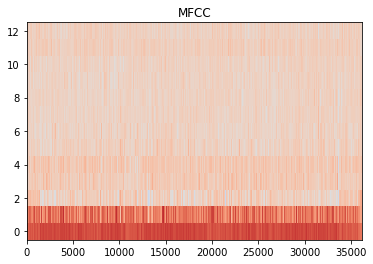

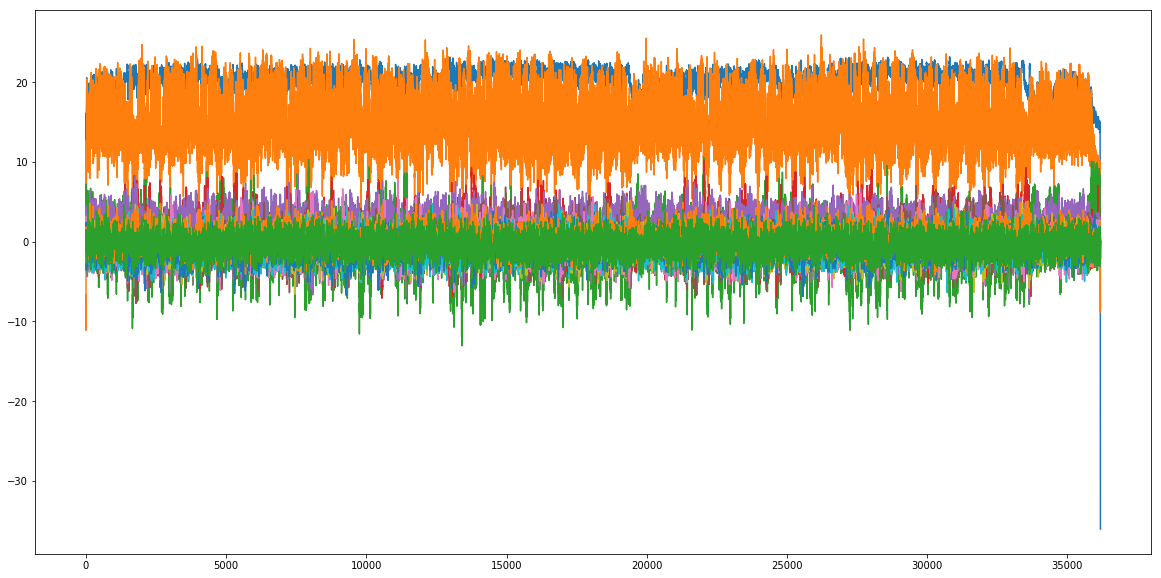

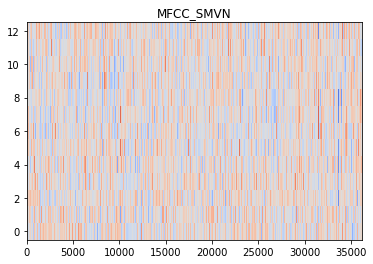

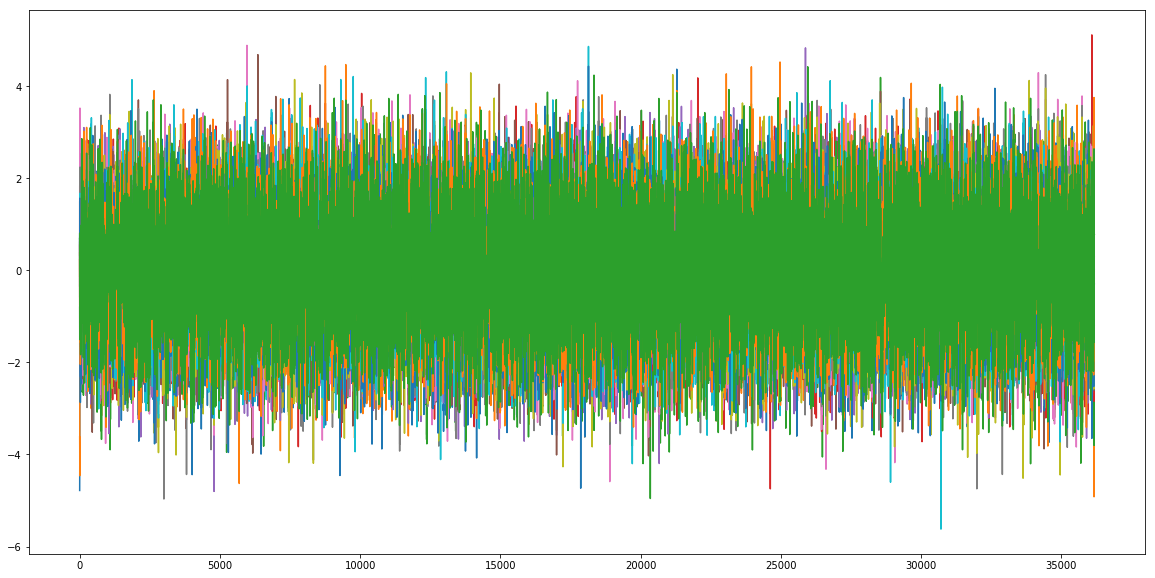

In [42]:
for file_name in get_playlist('.\\wavs\\'):
    features = extr_mfcc(file_name)
    if len(features[0]):
        dump(file_name, ".\\mfccs\\", features[0])
    print(file_name)
    plot_2d_features(features[0], 0,len(features[0]),'MFCC')
    plot_2d_features(features[1], 0,len(features[0]),'MFCC_SMVN')